<a href="https://colab.research.google.com/github/Brendromero/PI2_siniestros/blob/main/ETL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etapa de ETL**

## Problematica del negocio:

* En esta etapa del proceso, asumimos el rol de *analistas de datos* dentro de la **Secretaria de Transporte** del gobierno de la ciudad de Buenos Aires. Los siniestros viales representan una seria problematica en la ciudad de Buenos Aires, con consecuencias que van desde lesiones leves hasta perdidas humanas irreparables. Ante este panorama, se hace imperativo llevar a cabo un analisis detallado de los datos disponibles entre los años 2016 y 2018 para comprender mejor los factores que contribuyen a estos incidentes y, en ultima instancia, tomar medidas para prevenirlos y reducir su impacto. El objetivo de este proceso ETL es integrar y estructurar los datos de siniestros viales, garantizando su calidad y coherencia para su posterior analisis y uso.


### Los datos brindados son a traves de la pagina del gobierno.

Desde esta pagina podremos obtener el archivo de excel.

[Homicidios](https://docs.google.com/spreadsheets/d/1nq00jGIZHQ1RLSET43zKnUsMsoFb-pBg/edit#gid=1625530738) (teniendo dos hojas llamadas 'HECHOS' y 'VICTIMAS'):
* **HECHOS**:
>* ID
>* N_VICTIMAS
>* FECHA
>* AAAA
>* MM
>* DD
>* HORA
>* HH
>* LUGAR_DEL_HECHO
>* TIPO_DE_CALLE
>* Calle
>* Altura
>* Cruce
>* Direccion normalizada
>* COMUNA
>* XY (CABA)
>* pos x
>* pos y
>* PARTICIPANTES
>* VICTIMA
>* ACUSADO

* **VICTIMAS**:
>* ID_hecho
>* FECHA
>* AAAA
>* MM
>* DD
>* ROL
>* VICTIMA
>* SEXO
>* EDAD
>* FECHA_FALLECIMIENTO

# **I. Importar librerias y conectar a google colab**

In [ ]:
import pandas as pd

In [ ]:
# Me conecto con google colab a mi drive para trabajar con los datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **II. Lectura del dataset de Excel**

## **Hoja 'HECHOS'**

In [ ]:
# Leo el archivo excel
hechos = pd.read_excel('/content/drive/MyDrive/Datasets_PI2/homicidios.xlsx', sheet_name='HECHOS')

In [ ]:
print(hechos.shape)
hechos.head()

(696, 21)


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [ ]:
print(f'tamanio del set antes de eliminar las filas repetidas: {hechos.shape}')
hechos.drop_duplicates(inplace=True)
print(f'tamanio del set despues de eliminar las filas repetidas: {hechos.shape}')

tamanio del set antes de eliminar las filas repetidas: (696, 21)
tamanio del set despues de eliminar las filas repetidas: (696, 21)


In [ ]:
# Obtengo informacion sobre todo el dataframe,
# Hay 6 variables numericas, 14 categoricas y una variable tipo fecha.
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [ ]:
print(hechos.shape)
hechos.isnull().sum()

(696, 21)


ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

### **Resumen de analisis de datos nulos**

* Tras una exploración de las columnas, hay algunas que tienen una cantidad significativa de datos nulos.
> * **Altura**: En el caso de esta columna, los datos faltantes representan alrededor del 80% del total de los datos sobre esa columna -no el total del dataset-, teniendo en cuenta que son 696 y habiendo una ausencia de 567.
> * **cruce**: En el caso de esta columna, los datos faltantes representan alrededor del 20% o menos del total de los datos en dicha columna, teniendo 171 datos nulos.

In [ ]:
# Analicemos las columnas que tienen nulos
hechos[['Altura', 'Cruce']]

,Altura,Cruce
0,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV."
1,NaN,DE LOS CORRALES AV.
2,2034.0,NaN
3,NaN,"VILLEGAS, CONRADO, GRAL."
4,NaN,"SAENZ PE?A, LUIS, PRES."
...,...,...
691,NaN,MOM
692,NaN,LACARRA AV.
693,NaN,TERRADA
694,4071.0,NaN


In [ ]:
hechos[hechos['Altura'].isnull()][['Altura', 'Cruce']]

,Altura,Cruce
0,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV."
1,NaN,DE LOS CORRALES AV.
3,NaN,"VILLEGAS, CONRADO, GRAL."
4,NaN,"SAENZ PE?A, LUIS, PRES."
5,NaN,ESCALADA AV.
...,...,...
689,NaN,"HUGO, VICTOR"
690,NaN,PUEYRREDON AV.
691,NaN,MOM
692,NaN,LACARRA AV.


### Decido eliminar la columna 'altura' ya que la mayor parte de sus datos son nulos y no hay manera en que podamos recuperar esos datos.

In [ ]:
# Elimino la columna 'altura'
hecho = hechos.drop('Altura', axis=1)
hecho.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [ ]:
# Renombro la columnas
df_hechos= hecho.rename(columns={'ID': 'id',
                                 'N_VICTIMAS': 'cantidad_victimas',
                                 'FECHA': 'fecha',
                                 'AAAA': 'año',
                                 'MM': 'mes',
                                 'DD': 'dia',
                                 'HORA': 'hora',
                                 'HH': 'franja_horaria',
                                 'LUGAR_DEL_HECHO': 'lugar_hecho',
                                 'TIPO_DE_CALLE': 'tipo_calle',
                                 'Calle': 'calle',
                                 'Cruce': 'cruce',
                                 'Dirección Normalizada': 'direccion_normalizada',
                                 'COMUNA': 'comuna',
                                 'PARTICIPANTES': 'participantes',
                                 'VICTIMA': 'victima',
                                 'ACUSADO': 'acusado',
                                 'XY (CABA)': 'xy',
                                 'pos x': 'x',
                                 'pos y': 'y'})

In [ ]:
df_hechos

,id,cantidad_victimas,fecha,año,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,comuna,xy,x,y,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [ ]:
# Cuento la cantidad de valores 'SD' en cada columna
cantidad_valores_sd_por_columna = (df_hechos == 'SD').sum()

# Muestro los resultados
print(cantidad_valores_sd_por_columna)

id                        0
cantidad_victimas         0
fecha                     0
año                       0
mes                       0
dia                       0
hora                      1
franja_horaria            1
lugar_hecho               1
tipo_calle                0
calle                     0
cruce                     0
direccion_normalizada     0
comuna                    0
xy                        0
x                         0
y                         0
participantes             0
victima                   9
acusado                  23
dtype: int64


In [ ]:
# Reemplazo 'SD' por NaN en las columnas, considerando espacios en blanco alrededor de 'SD'
df_hechos['acusado'] = df_hechos['acusado'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)
df_hechos['victima'] = df_hechos['victima'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)
df_hechos['hora'] = df_hechos['hora'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)
df_hechos['franja_horaria'] = df_hechos['franja_horaria'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)
df_hechos['lugar_hecho'] = df_hechos['lugar_hecho'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)

# Muestro el dataframe después de reemplazar
print(df_hechos)

            id  cantidad_victimas      fecha   año  mes  dia      hora  \
0    2016-0001                  1 2016-01-01  2016    1    1  04:00:00   
1    2016-0002                  1 2016-01-02  2016    1    2  01:15:00   
2    2016-0003                  1 2016-01-03  2016    1    3  07:00:00   
3    2016-0004                  1 2016-01-10  2016    1   10  00:00:00   
4    2016-0005                  1 2016-01-21  2016    1   21  05:20:00   
..         ...                ...        ...   ...  ...  ...       ...   
691  2021-0093                  1 2021-12-13  2021   12   13  17:10:00   
692  2021-0094                  1 2021-12-20  2021   12   20  01:10:00   
693  2021-0095                  1 2021-12-30  2021   12   30  00:43:00   
694  2021-0096                  1 2021-12-15  2021   12   15  10:30:00   
695  2021-0097                  1 2021-11-18  2021   11   18  06:10:00   

     franja_horaria                                lugar_hecho tipo_calle  \
0               4.0  AV PIEDRA BUE

In [ ]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     696 non-null    object        
 1   cantidad_victimas      696 non-null    int64         
 2   fecha                  696 non-null    datetime64[ns]
 3   año                    696 non-null    int64         
 4   mes                    696 non-null    int64         
 5   dia                    696 non-null    int64         
 6   hora                   695 non-null    object        
 7   franja_horaria         695 non-null    float64       
 8   lugar_hecho            695 non-null    object        
 9   tipo_calle             696 non-null    object        
 10  calle                  695 non-null    object        
 11  cruce                  525 non-null    object        
 12  direccion_normalizada  688 non-null    object        
 13  comun

In [ ]:
# Ordenar las columnas
column_order = ['id', 'fecha', 'dia','mes','año', 'victima','hora', 'franja_horaria','participantes', 'acusado', 'cantidad_victimas', 'comuna','lugar_hecho',
                'tipo_calle', 'calle', 'cruce', 'direccion_normalizada','xy', 'x', 'y']
df_new_hechos = df_hechos.reindex(columns=column_order)
df_new_hechos

,id,fecha,dia,mes,año,victima,hora,franja_horaria,participantes,acusado,cantidad_victimas,comuna,lugar_hecho,tipo_calle,calle,cruce,direccion_normalizada,xy,x,y
0,2016-0001,2016-01-01,1,1,2016,MOTO,04:00:00,4,MOTO-AUTO,AUTO,1,8,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022
1,2016-0002,2016-01-02,2,1,2016,AUTO,01:15:00,1,AUTO-PASAJEROS,PASAJEROS,1,9,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709
2,2016-0003,2016-01-03,3,1,2016,MOTO,07:00:00,7,MOTO-AUTO,AUTO,1,1,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362
3,2016-0004,2016-01-10,10,1,2016,MOTO,00:00:00,0,MOTO-SD,SD,1,8,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974
4,2016-0005,2016-01-21,21,1,2016,MOTO,05:20:00,5,MOTO-PASAJEROS,PASAJEROS,1,1,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,2021-12-13,13,12,2021,MOTO,17:10:00,17,MOTO-AUTO,AUTO,1,7,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,MOM,RIESTRA AV. y MOM,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636
692,2021-0094,2021-12-20,20,12,2021,MOTO,01:10:00,1,MOTO-AUTO,AUTO,1,9,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757
693,2021-0095,2021-12-30,30,12,2021,MOTO,00:43:00,0,MOTO-CARGAS,CARGAS,1,11,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,TERRADA,GAONA AV. y TERRADA,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745
694,2021-0096,2021-12-15,15,12,2021,AUTO,10:30:00,10,AUTO-CARGAS,CARGAS,1,9,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",NaN,"PERON, EVA AV. 4071",Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673


# **III. Lectura del dataset de Excel**

## **Hoja 'VICTIMAS'**

In [ ]:
# Leo el archivo excel
victimas = pd.read_excel('/content/drive/MyDrive/Datasets_PI2/homicidios.xlsx', sheet_name='VICTIMAS')

In [ ]:
# Visualizo las primeras columnas del dataframe
print(victimas.shape)
victimas.head()

(717, 10)


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [ ]:
print(f'tamanio del set antes de eliminar las filas repetidas: {victimas.shape}')
victimas.drop_duplicates(inplace=True)
print(f'tamanio del set despues de eliminar las filas repetidas: {victimas.shape}')

tamanio del set antes de eliminar las filas repetidas: (717, 10)
tamanio del set despues de eliminar las filas repetidas: (717, 10)


In [ ]:
# Obtengo informacion sobre todo el dataframe,
# Hay 3 variables numericas, 6 categoricas y una variable tipo fecha.
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [ ]:
# Renombro la columnas
df_victima = victimas.rename(columns={ 'ID_hecho': 'id',
                                 'FECHA': 'fecha',
                                  'AAAA': 'año',
                                  'MM': 'mes',
                                  'DD': 'dia',
                                  'ROL': 'rol',
                                  'VICTIMA': 'victima',
                                  'SEXO': 'sexo',
                                  'EDAD': 'edad',
                                  'FECHA_FALLECIMIENTO': 'fecha_fallecimiento'})

In [ ]:
df_victima.columns

Index(['id', 'fecha', 'año', 'mes', 'dia', 'rol', 'victima', 'sexo', 'edad',
       'fecha_fallecimiento'],
      dtype='object')

In [ ]:
# Cuento la cantidad de valores 'SD' en cada columna
cantidad_valores_sd_por_columna = (df_victima == 'SD').sum()

# Muestro los resultados
print(cantidad_valores_sd_por_columna)

id                      0
fecha                   0
año                     0
mes                     0
dia                     0
rol                    11
victima                 9
sexo                    6
edad                   53
fecha_fallecimiento    68
dtype: int64


In [ ]:
# Reemplazo 'SD' por NaN en las columnas, considerando espacios en blanco alrededor de 'SD'
df_victima['rol'] = df_victima['rol'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)
df_victima['victima'] = df_victima['victima'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)
df_victima['sexo'] = df_victima['sexo'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)
df_victima['edad'] = df_victima['edad'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)
df_victima['fecha_fallecimiento'] = df_victima['fecha_fallecimiento'].apply(lambda x: np.nan if str(x).strip() == 'SD' else x)

# Muestro el dataframe después de reemplazar
print(df_victima)

            id      fecha   año  mes  dia                   rol victima  \
0    2016-0001 2016-01-01  2016    1    1             CONDUCTOR    MOTO   
1    2016-0002 2016-01-02  2016    1    2             CONDUCTOR    AUTO   
2    2016-0003 2016-01-03  2016    1    3             CONDUCTOR    MOTO   
3    2016-0004 2016-01-10  2016    1   10             CONDUCTOR    MOTO   
4    2016-0005 2016-01-21  2016    1   21             CONDUCTOR    MOTO   
..         ...        ...   ...  ...  ...                   ...     ...   
712  2021-0092 2021-12-12  2021   12   12                PEATON  PEATON   
713  2021-0093 2021-12-13  2021   12   13  PASAJERO_ACOMPAÑANTE    MOTO   
714  2021-0094 2021-12-20  2021   12   20  PASAJERO_ACOMPAÑANTE    MOTO   
715  2021-0095 2021-12-30  2021   12   30             CONDUCTOR    MOTO   
716  2021-0096 2021-12-15  2021   12   15             CONDUCTOR    AUTO   

          sexo  edad  fecha_fallecimiento  
0    MASCULINO  19.0  2016-01-01 00:00:00  
1    MASCUL

In [ ]:
df_victima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   717 non-null    object        
 1   fecha                717 non-null    datetime64[ns]
 2   año                  717 non-null    int64         
 3   mes                  717 non-null    int64         
 4   dia                  717 non-null    int64         
 5   rol                  706 non-null    object        
 6   victima              708 non-null    object        
 7   sexo                 711 non-null    object        
 8   edad                 664 non-null    float64       
 9   fecha_fallecimiento  649 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 56.1+ KB


Antes de iniciar el EDA, organizare las columnas para mejorar la legibilidad y la estructura del conjunto de datos

In [ ]:
# Ordenar las columnas
column_order = ['id', 'fecha', 'dia', 'mes', 'año', 'victima','rol', 'edad', 'sexo', 'fecha_fallecimiento']
victima = df_victima.reindex(columns=column_order)
victima

,id,fecha,dia,mes,año,victima,rol,edad,sexo,fecha_fallecimiento
0,2016-0001,2016-01-01,1,1,2016,MOTO,CONDUCTOR,19.0,MASCULINO,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2,1,2016,AUTO,CONDUCTOR,70.0,MASCULINO,2016-01-02 00:00:00
2,2016-0003,2016-01-03,3,1,2016,MOTO,CONDUCTOR,30.0,MASCULINO,2016-01-03 00:00:00
3,2016-0004,2016-01-10,10,1,2016,MOTO,CONDUCTOR,18.0,MASCULINO,NaN
4,2016-0005,2016-01-21,21,1,2016,MOTO,CONDUCTOR,29.0,MASCULINO,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,12,12,2021,PEATON,PEATON,50.0,FEMENINO,2021-12-12 00:00:00
713,2021-0093,2021-12-13,13,12,2021,MOTO,PASAJERO_ACOMPAÑANTE,18.0,FEMENINO,2021-12-18 00:00:00
714,2021-0094,2021-12-20,20,12,2021,MOTO,PASAJERO_ACOMPAÑANTE,43.0,FEMENINO,2021-12-20 00:00:00
715,2021-0095,2021-12-30,30,12,2021,MOTO,CONDUCTOR,27.0,MASCULINO,2022-01-02 00:00:00


In [ ]:
new_columns = pd.merge(df_new_hechos, df_victima, on=['id', 'fecha', 'dia', 'mes', 'año', 'victima'], how='left')

In [ ]:
new_columns

,id,fecha,dia,mes,año,victima,hora,franja_horaria,participantes,acusado,...,calle,cruce,direccion_normalizada,xy,x,y,rol,sexo,edad,fecha_fallecimiento
0,2016-0001,2016-01-01,1,1,2016,MOTO,04:00:00,4,MOTO-AUTO,AUTO,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2,1,2016,AUTO,01:15:00,1,AUTO-PASAJEROS,PASAJEROS,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00
2,2016-0003,2016-01-03,3,1,2016,MOTO,07:00:00,7,MOTO-AUTO,AUTO,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00
3,2016-0004,2016-01-10,10,1,2016,MOTO,00:00:00,0,MOTO-SD,SD,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,CONDUCTOR,MASCULINO,18.0,NaN
4,2016-0005,2016-01-21,21,1,2016,MOTO,05:20:00,5,MOTO-PASAJEROS,PASAJEROS,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,CONDUCTOR,MASCULINO,29.0,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2021-0093,2021-12-13,13,12,2021,MOTO,17:10:00,17,MOTO-AUTO,AUTO,...,RIESTRA AV.,MOM,RIESTRA AV. y MOM,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18 00:00:00
711,2021-0094,2021-12-20,20,12,2021,MOTO,01:10:00,1,MOTO-AUTO,AUTO,...,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20 00:00:00
712,2021-0095,2021-12-30,30,12,2021,MOTO,00:43:00,0,MOTO-CARGAS,CARGAS,...,GAONA AV.,TERRADA,GAONA AV. y TERRADA,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,CONDUCTOR,MASCULINO,27.0,2022-01-02 00:00:00
713,2021-0096,2021-12-15,15,12,2021,AUTO,10:30:00,10,AUTO-CARGAS,CARGAS,...,"PERON, EVA AV.",NaN,"PERON, EVA AV. 4071",Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,CONDUCTOR,MASCULINO,60.0,2021-12-20 00:00:00


In [ ]:
new_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     715 non-null    object        
 1   fecha                  715 non-null    datetime64[ns]
 2   dia                    715 non-null    int64         
 3   mes                    715 non-null    int64         
 4   año                    715 non-null    int64         
 5   victima                715 non-null    object        
 6   hora                   715 non-null    object        
 7   franja_horaria         715 non-null    object        
 8   participantes          715 non-null    object        
 9   acusado                715 non-null    object        
 10  cantidad_victimas      715 non-null    int64         
 11  comuna                 715 non-null    int64         
 12  lugar_hecho            715 non-null    object        
 13  tipo_

In [ ]:
# Convierto ese dataframe en un archivo csv
csv_file_path = '/content/drive/MyDrive/Datasets_PI2/siniestros.csv'
new_columns.to_csv(csv_file_path, index=False)

# **Elaboración de EDA**

* El presente EDA tiene como objetivo principal explorar las diferentes dimensiones de los siniestros viales en la ciudad de Buenos Aires a través del conjunto de datos creado en la etapa de ETL, la cual contiene información detallada sobre diversos aspectos relacionados con estos incidentes. Este analisis se centrara en examinar las caracteristicas de los siniestros, las condiciones en las que ocurren, los perfiles de las personas involucradas y otros factores relevantes que puedan ayudar a identificar patrones y tendencias significativas. A través de este analisis, esperamos obtener una vision mas clara y completa de la problematica de los siniestros viales en Buenos Aires, lo que permitira orientar politicas y acciones que contribuyan a mejorar la seguridad en las calles de la ciudad y proteger la vida de sus habitantes.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_PI2/siniestros.csv')

In [ ]:
print(df.shape)
df

(715, 24)


,id,fecha,dia,mes,año,victima,hora,franja_horaria,participantes,acusado,...,calle,cruce,direccion_normalizada,xy,x,y,rol,sexo,edad,fecha_fallecimiento
0,2016-0001,2016-01-01,1,1,2016,MOTO,04:00:00,4,MOTO-AUTO,AUTO,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2,1,2016,AUTO,01:15:00,1,AUTO-PASAJEROS,PASAJEROS,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00
2,2016-0003,2016-01-03,3,1,2016,MOTO,07:00:00,7,MOTO-AUTO,AUTO,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00
3,2016-0004,2016-01-10,10,1,2016,MOTO,00:00:00,0,MOTO-SD,SD,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,CONDUCTOR,MASCULINO,18.0,NaN
4,2016-0005,2016-01-21,21,1,2016,MOTO,05:20:00,5,MOTO-PASAJEROS,PASAJEROS,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,CONDUCTOR,MASCULINO,29.0,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2021-0093,2021-12-13,13,12,2021,MOTO,17:10:00,17,MOTO-AUTO,AUTO,...,RIESTRA AV.,MOM,RIESTRA AV. y MOM,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18 00:00:00
711,2021-0094,2021-12-20,20,12,2021,MOTO,01:10:00,1,MOTO-AUTO,AUTO,...,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20 00:00:00
712,2021-0095,2021-12-30,30,12,2021,MOTO,00:43:00,0,MOTO-CARGAS,CARGAS,...,GAONA AV.,TERRADA,GAONA AV. y TERRADA,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,CONDUCTOR,MASCULINO,27.0,2022-01-02 00:00:00
713,2021-0096,2021-12-15,15,12,2021,AUTO,10:30:00,10,AUTO-CARGAS,CARGAS,...,"PERON, EVA AV.",NaN,"PERON, EVA AV. 4071",Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,CONDUCTOR,MASCULINO,60.0,2021-12-20 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     715 non-null    object 
 1   fecha                  715 non-null    object 
 2   dia                    715 non-null    int64  
 3   mes                    715 non-null    int64  
 4   año                    715 non-null    int64  
 5   victima                715 non-null    object 
 6   hora                   715 non-null    object 
 7   franja_horaria         715 non-null    object 
 8   participantes          715 non-null    object 
 9   acusado                715 non-null    object 
 10  cantidad_victimas      715 non-null    int64  
 11  comuna                 715 non-null    int64  
 12  lugar_hecho            715 non-null    object 
 13  tipo_calle             715 non-null    object 
 14  calle                  714 non-null    object 
 15  cruce 

In [ ]:
# Calculo el porcentaje de valores ausentes en cada columna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Creo un nuevo dataframe para visualizar los resultados
missing_data = pd.DataFrame({'Columna': df.columns, 'Porcentaje de valores ausentes': missing_percentage})

# Muestro el dataframe con el porcentaje de valores ausentes
print(missing_data)

                                     Columna  Porcentaje de valores ausentes
id                                        id                        0.000000
fecha                                  fecha                        0.000000
dia                                      dia                        0.000000
mes                                      mes                        0.000000
año                                      año                        0.000000
victima                              victima                        0.000000
hora                                    hora                        0.000000
franja_horaria                franja_horaria                        0.000000
participantes                  participantes                        0.000000
acusado                              acusado                        0.000000
cantidad_victimas          cantidad_victimas                        0.000000
comuna                                comuna                        0.000000

### **Resumen estadistico**

* En el siguiente resumen podemos marcar algunas observaciones que nos podran ayudar sobre nuestro analisis:
> * **Edad**: La edad promedio es alrededor de 42.2 años, con una desviacion estandar de aproximadamente 19.8 años, lo que indica una dispersion significativa en las edades de las victimas. El valor mínimo de 1 año muestra que hay victimas de accidentes de todas las edades.
> * **Año y mes**: La mayoria de los accidentes parecen haber ocurrido en 2018, especialmente en el mes 5-6. Esto podria ser util para identificar posibles patrones estacionales o tendencias a lo largo del tiempo.
> * **Comuna**: La comuna promedio parece ser la comuna 7, con una desviacion estandar de la comuna 4. El valor minimo de 1 indica que hay al menos una comuna con un numero bajo de accidentes, lo que podría ser importante para investigar mas a fondo.


In [ ]:
df.describe()

,dia,mes,año,cantidad_victimas,comuna,edad
count,715.000000,715.000000,715.000000,715.000000,715.000000,653.000000
mean,15.988811,6.678322,2018.173427,1.058741,7.419580,42.235835
std,8.661540,3.573560,1.673025,0.252530,4.385826,19.739705
min,1.000000,1.000000,2016.000000,1.000000,0.000000,1.000000
25%,9.000000,4.000000,2017.000000,1.000000,4.000000,27.000000
50%,16.000000,7.000000,2018.000000,1.000000,8.000000,37.000000
75%,23.000000,10.000000,2019.000000,1.000000,11.000000,56.000000
max,31.000000,12.000000,2021.000000,3.000000,15.000000,95.000000


### **Correlación entre valores numericos**

In [ ]:
# Excluir columnas no numéricas antes de calcular la correlación
columnas_numericas = df.select_dtypes(include=[np.number]).columns
df_numericas = df[columnas_numericas]
corr = df_numericas.corr()

* Observaciones basadas sobre los valores de correlacion:
>* En la variable **mes** parece tener una correlacion positiva breve con **año** y **comuna**.
>* En las variables **año** tiene una correlación débil con **edad**.
>* En la variable **cantidad_victimas** tiene una correlación debil con **dia**, **mes** y **año**.
>* La variable **comuna** tiene una correlación debil con **mes** y **cantidad_victimas**.
>* La variable **edad** tiene una correlación debil con **año**.

In [ ]:
# Grafico la matriz que genere anteriormente
corr.style.background_gradient()

,dia,mes,año,cantidad_victimas,comuna,edad
dia,1.000000,-0.021926,-0.041522,0.039360,0.003442,0.002182
mes,-0.021926,1.000000,-0.041256,-0.030247,0.055717,0.023902
año,-0.041522,-0.041256,1.000000,-0.073872,0.017173,0.095981
cantidad_victimas,0.039360,-0.030247,-0.073872,1.000000,-0.015962,-0.071130
comuna,0.003442,0.055717,0.017173,-0.015962,1.000000,-0.054126
edad,0.002182,0.023902,0.095981,-0.071130,-0.054126,1.000000


### **Mapa de calor**

* Esto nos ayudara a comprender mejor la relacion entres las variables numericas:

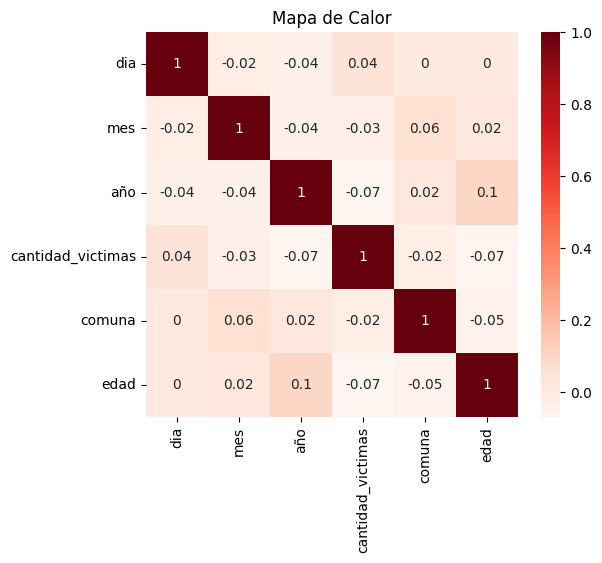

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap='Reds', annot=True)
plt.title('Mapa de Calor')
plt.show()

# **I. Visualización de los datos**

### **Observaciones**:

* Analisis sobre las columnas numericas:
>* **Mes**: Se observa una distribucion significativa en diciembre, enero y septiembre, que son los meses con mayor cantidad de accidentes registrados.
>* **Edad**: Aunque los datos abarque un rango amplio de edades, desde recien nacidos hasta personas de 80 o 90 años, hay una tendencia marcada entre los 20 y 40 años, quienes son participes de incidentes.
>* **Comuna**: Se observa una distribucion significativa entre las comunas, siendo la comuna 3-4 la que presenta el mayor numero de incidentes, seguida por la 10 y la 1.

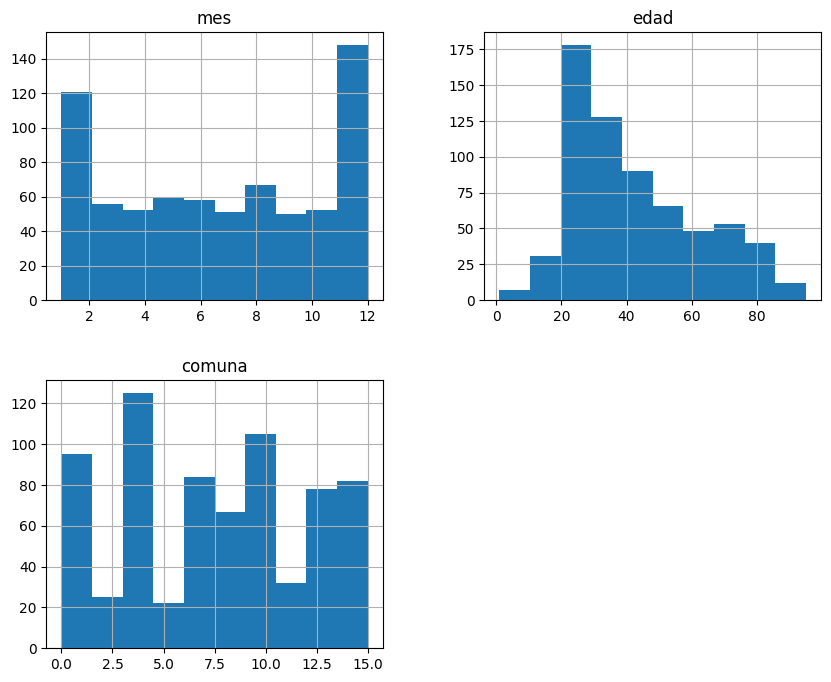

In [ ]:
# Selecciono solo las columnas numericas especificas
columnas_numericas_especificas = ['mes', 'edad', 'comuna']
df_numeric_especifico = df[columnas_numericas_especificas]

# Genero histogramas para cada variable numerica
df_numeric_especifico.hist(figsize=(10, 8))
plt.show()

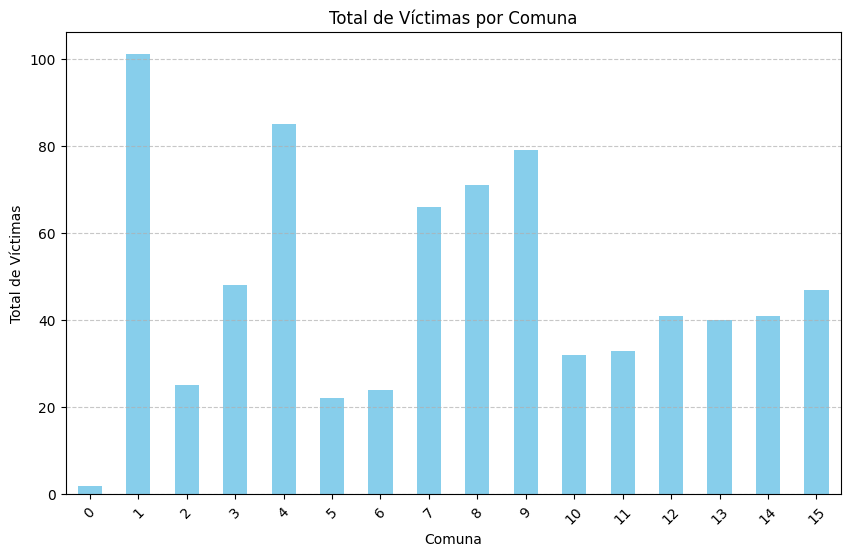

In [ ]:
# Agrupo por comuna y sumo el total de victimas
victimas_por_anio = df.groupby('comuna')['cantidad_victimas'].sum()

# Creo el grafico de barras
plt.figure(figsize=(10, 6))
victimas_por_anio.plot(kind='bar', color='skyblue')
plt.title('Total de Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Total de Víctimas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Oberservaciones**

* Conteo de valores unicos y frecuencia en variables categoricas:
> * **Rol**: Hay una distribucion clara de los involucrados en los siniestros, como conductores siendo el grupo mas grande, seguido de peatones, pasajeros y ciclistas.
> * **Tipo de vehiculos**: Se observa una variedad de tipos de vehiculos involucrados en los siniestros, siendo que las motos son el grupo mas grande, seguido de peatones, automoviles y bicicletas.
> * **Ubicaciones**: Existen ubicaciones especificas en la ciudad donde se concentran los siniestros viales, como el mayor numero se observan en las avenidas lo que sugiere areas de alto riesgo y pensar en posibles mejoras para el bienestar de los ciudadanos.

In [ ]:
# Selecciono solo las columnas categoricas
df_categorico = df.select_dtypes(include=['object'])

# Itero sobre cada columna categorica y muestro el conteo de valores unicos y su frecuencia
for columna in df_categorico.columns:
    print(f"Variable: {columna}")
    print(df[columna].value_counts())
    print()

Variable: id
id
2017-0035    3
2017-0050    2
2017-0036    2
2016-0041    2
2018-0015    2
            ..
2017-0114    1
2017-0115    1
2017-0116    1
2017-0118    1
2021-0097    1
Name: count, Length: 696, dtype: int64

Variable: fecha
fecha
2017-02-26    3
2016-02-28    3
2017-11-19    3
2017-12-11    3
2018-04-27    3
             ..
2017-11-17    1
2017-11-16    1
2017-11-07    1
2017-11-06    1
2021-11-18    1
Name: count, Length: 598, dtype: int64

Variable: victima
victima
MOTO           302
PEATON         266
AUTO            92
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            3
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

Variable: hora
hora
05:00:00    11
09:00:00    10
16:00:00    10
12:30:00    10
21:00:00    10
            ..
12:14:10     1
08:43:00     1
09:50:00     1
23:22:17     1
00:43:00     1
Name: count, Length: 325, dtype: int64

Variable: franja_horaria
franja_horaria
7     42
6     42
5     39
9     

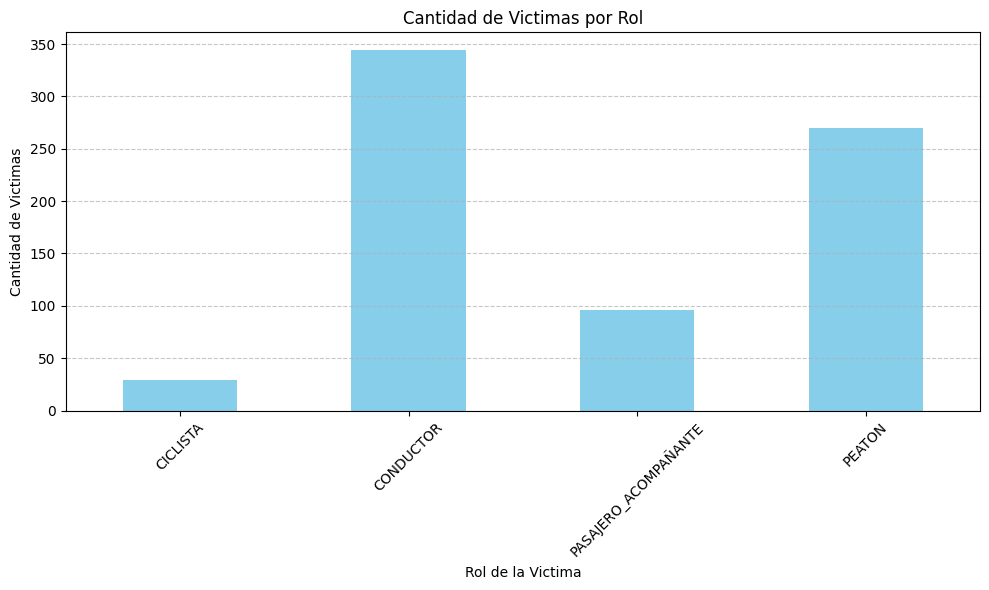

In [ ]:
# Agrupo los datos por rol de victima y calculo la cantidad de victimas para cada rol
victimas_por_rol = df.groupby('rol')['cantidad_victimas'].sum()

# Creo un grafico de barras
plt.figure(figsize=(10, 6))
victimas_por_rol.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Victimas por Rol')
plt.xlabel('Rol de la Victima')
plt.ylabel('Cantidad de Victimas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

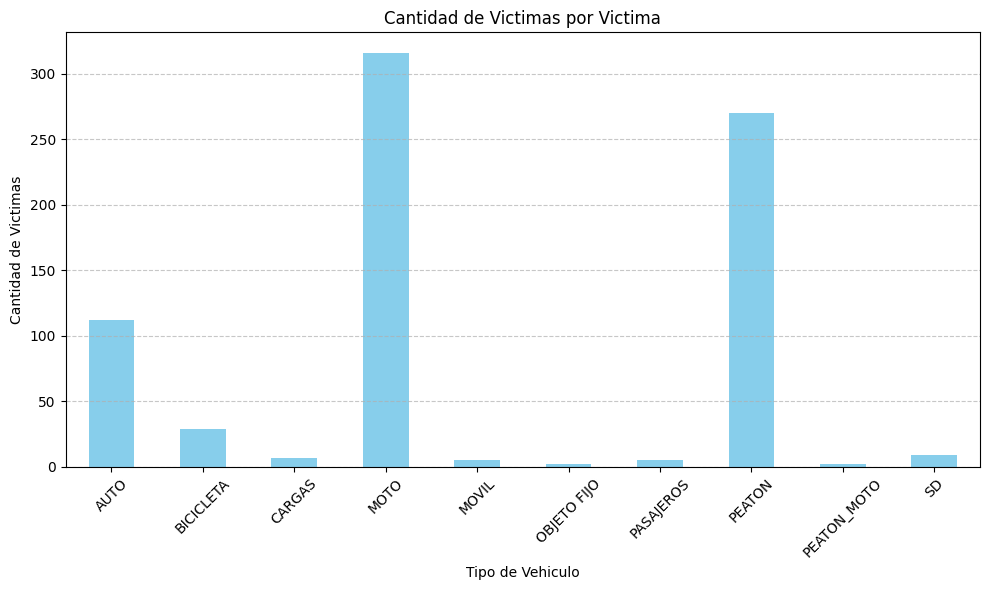

In [ ]:
# Agrupo los datos por tipo de vehiculo y calculo la cantidad de victimas para cada tipo de vehiculo
victimas_por_tipo_vehiculo = df.groupby('victima')['cantidad_victimas'].sum()

# Creo un grafico de barras
plt.figure(figsize=(10, 6))
victimas_por_tipo_vehiculo.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Victimas por Victima')
plt.xlabel('Tipo de Vehiculo')
plt.ylabel('Cantidad de Victimas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

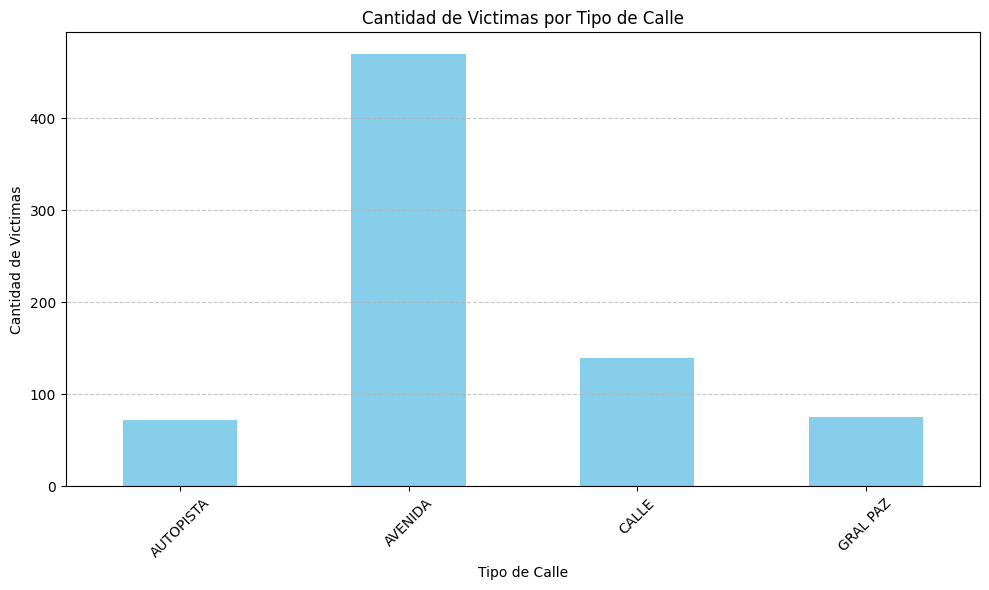

In [ ]:
# Agrupo los datos por tipo de calle y calculo la cantidad de victimas para cada tipo de calle
victimas_por_tipo_calle = df.groupby('tipo_calle')['cantidad_victimas'].sum()

# Creo un grafico de barras
plt.figure(figsize=(10, 6))
victimas_por_tipo_calle.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Victimas por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Victimas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Observaciones**:

* Deteccion de valores atipicos o anomalos que puedan afectar la calidad de los datos:
>* En el siguiente grafico podemos hacer una observacion sobre una subida pronunciada en el rango de edades entre 20 y 40 años, por lo que podemos deducir que este grupo de edad enfrenta un mayor riesgo en estar involucrados en siniestros viales a diferencia de otros grupos de edades.

* Grafico de dispersion:

>* Un valor atipico puede observarse por debajo de la cantidad de 35 o los que estan levemente separados de la linea descenciente sobre los 30-60 años hasta los 80 años.

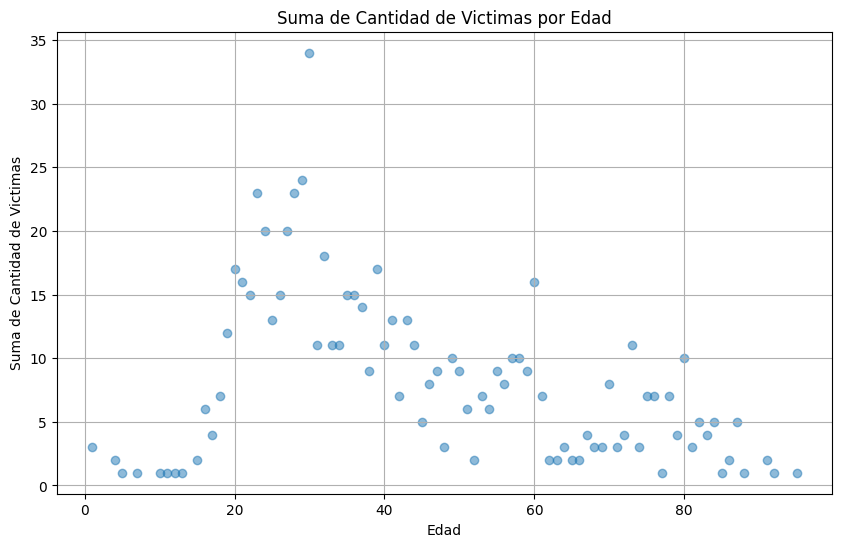

In [ ]:
# Agrupo por edad y sumar la cantidad de victimas
suma_victimas_por_edad = df.groupby('edad')['cantidad_victimas'].sum().reset_index()

# Creo el grafico de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(suma_victimas_por_edad['edad'], suma_victimas_por_edad['cantidad_victimas'], alpha=0.5)
plt.title('Suma de Cantidad de Victimas por Edad')
plt.xlabel('Edad')
plt.ylabel('Suma de Cantidad de Victimas')
plt.grid(True)
plt.show()

* Grafico de barras:

>* En este siguiente grafico se puede observar mas detalladamente sobre la cantidad de victimas que se tuvo cada año, siendo que entre 2016 y 2018 tienen mayor numero de victimas en diferencia con los años restantes.

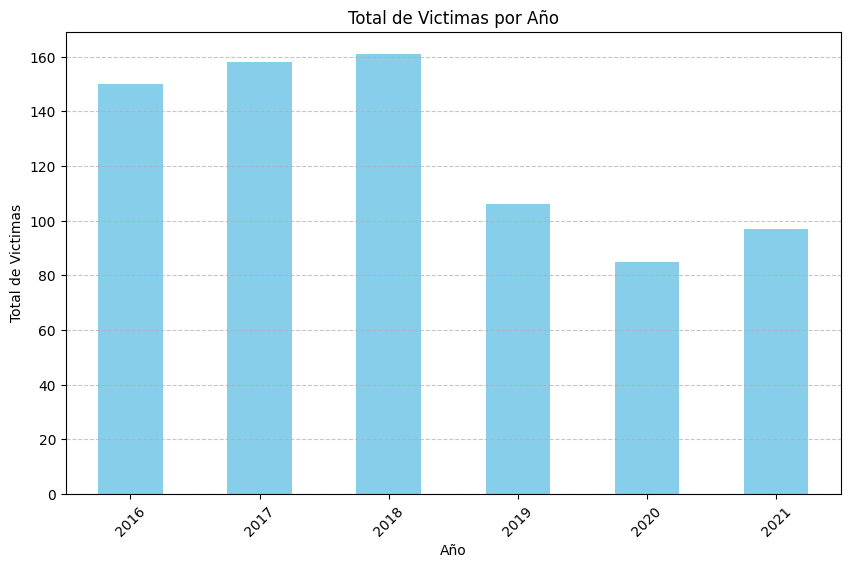

In [ ]:
# Agrupo por año y sumar el total de victimas
victimas_por_anio = df.groupby('año')['cantidad_victimas'].sum()

# Creo el grafico de barras
plt.figure(figsize=(10, 6))
victimas_por_anio.plot(kind='bar', color='skyblue')
plt.title('Total de Victimas por Año')
plt.xlabel('Año')
plt.ylabel('Total de Victimas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Grafico de barras separadas:

>* En este siguiente grafico se podra observar que afirmando nuestro grafico anterior, siendo el 2018 presentando el mayor de victimas pero obteniendo una informacion mas detallada de nuestros datos. Observamos que cada año el genero masculina representa un grupo mayor de incidentes en comparación con el femenino.

<Figure size 1000x600 with 0 Axes>

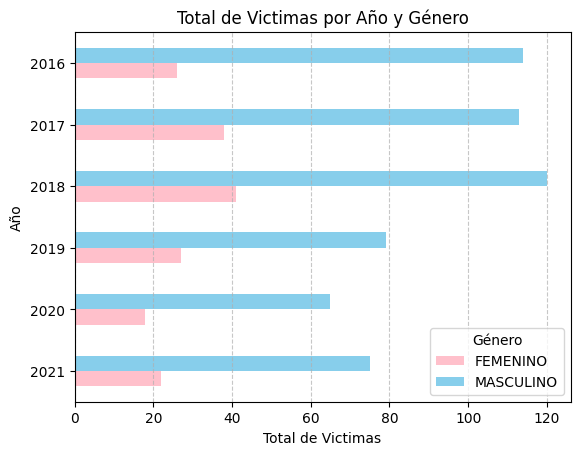

In [ ]:
# Agrupo por año y genero, y sumar el total de victimas
victimas_por_anio_y_genero = df.groupby(['año', 'sexo'])['cantidad_victimas'].sum().unstack()


# Invvierto el orden de los indices para que los años comiencen desde 2015
victimas_por_anio_y_genero = victimas_por_anio_y_genero.iloc[::-1]

# Creo el grafico de barras separadas y en horizontal
plt.figure(figsize=(10, 6))
victimas_por_anio_y_genero.plot(kind='barh', color=['pink', 'skyblue'], stacked=False)
plt.title('Total de Victimas por Año y Género')
plt.xlabel('Total de Victimas')
plt.ylabel('Año')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Género')
plt.show()

In [ ]:
# Agrupo por año, mes y sumo el numero de victimas
relacion_time = df.groupby(['año', 'mes'])['cantidad_victimas'].sum().reset_index()

In [ ]:
relacion_time

,año,mes,cantidad_victimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


Tras llevar a cabo el analisis exploratorio de nuestros datos, se pudo identificar algunas observaciones importantes:

* **Distribución temporal**:
>* Se observo como con anterioridad una concentración de siniestros en los meses de diciembre, enero y septiembre.
>* El año 2018 se registro la mayor cantidad de siniestros, con una diferencia breve con 2017, pero significativa entre los años 2019 y 2021.

* **Caracteristicas demograficas**:
>* La mayoria de los involucrados en siniestros viales se encuentran en un rango de edad entre 20 y 40 años, lo que sugiere una alta incidencia en este grupo demografico.
>* La mayoria de los involucadros pertenecen al grupo masculino durantes los años presentados, teniendo una diferencia significativa con el genero femenino.
>* Se observo una distribución desigual de siniestros entre diferentes comunas de la ciudad, con algunas comunas mostrando una mayor incidencia que otras.

* **Tipos de vehiculos involucrados**:
>* Las motocicletas fueron el tipo de vehiculo mas comunmente involucrado, seguidas de peatones y automoviles.

* **Valores atipicos**:
>* Se identificaron valores atipicos en ciertas variables, como la cantidad de victimas por edad, que podrian indicar casos inusuales o errores en los datos.


En resumen, el analisis exploratorio revelo patrones interesantes y proporciono informacion valiosa sobre los factores asociados con los siniestros viales en la ciudad de Buenos Aires.

# **CONCLUSION**:

* Dado que observamos una concentracion de siniestros en ciertos meses del año, se podria implementar una mayor vigilancia y concientizacion durante estos periodos. Esto podria incluir campañas de seguridad vial y un refuerzo policial en las calles que presentan un mayor numero de accidentes.
* Pensando que la mayoria de los involucrados se encuentran en el rango de edad entre 20 y 40 años, se podrian crear programas de educacion vial dirigidos a este grupo. Estos programas podrian centrarse en concientizar sobre los riesgos de conducir bajo los efectos del alcohol, el exceso de velocidad y otras conductas peligrosas.
* Dado que observamos una distribucion desigual entre diferentes comunas de la ciudad, se podria priorizar la implementacion de medidas sobre seguridad vial en las comunas con un mayor numero de accidentes. Esto podria incluir la mejora de la infraestructura vial, como la de mas señalizaciones y semaforos.
* Dado que las motocicletas son el tipo de vehiculo mas comunmente involucrado en siniestros, se podrian implementar medidas especificas para mejorar la seguridad de los motociclistas, como campañas sobre el uso del casco y el respeto de las normas de transito.
